In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


**export data**

In [93]:
df=pd.read_csv('../csv/apartments_db.mubawab.csv')
print(df.head())

                                                 _id gouvernorat  \
0  9640d5dccdfd9b5c4a45e8406c32751838aca9029d66f8...       tunis   
1  8ae77a6b1c36d45ddb78aa7dd34d9cd3a21a89073927ac...       tunis   
2  723d5c50c2ea07db6a21f6805449bab0acccdeb280ef71...       tunis   
3  6e7883ddcf44a125dd34f600fe664891b7b1c75d953d92...       tunis   
4  47643d27c8e43aae55bd07969263224dc09b417bc37030...       tunis   

                          delegation      prix  superficie  nb_pieces  \
0  Les Jardins de Carthage à Le Kram       NaN         125        3.0   
1  Les Jardins de Carthage à Le Kram       NaN         181        4.0   
2  Les Jardins de Carthage à Le Kram       NaN          65        2.0   
3                  Aouina à La Marsa  340000.0          88        3.0   
4       Ain Zaghouan Nord à La Marsa       NaN         121        3.0   

   chambres  salle_de_bains           etat etage       standing  \
0       2.0             2.0  Moins d'un an  2ème  Haut standing   
1       3.0       

**drop unnecessary scraped data**

In [94]:
df.drop(columns=['_id', 'standing', 'description'], inplace=True)

In [95]:
print(df.head())

  gouvernorat                         delegation      prix  superficie  \
0       tunis  Les Jardins de Carthage à Le Kram       NaN         125   
1       tunis  Les Jardins de Carthage à Le Kram       NaN         181   
2       tunis  Les Jardins de Carthage à Le Kram       NaN          65   
3       tunis                  Aouina à La Marsa  340000.0          88   
4       tunis       Ain Zaghouan Nord à La Marsa       NaN         121   

   nb_pieces  chambres  salle_de_bains           etat etage  
0        3.0       2.0             2.0  Moins d'un an  2ème  
1        4.0       3.0             2.0  Moins d'un an   NaN  
2        2.0       1.0             1.0        Nouveau   NaN  
3        3.0       2.0             1.0  Moins d'un an   NaN  
4        3.0       2.0             2.0  Moins d'un an  2ème  


**Data description & first peak visualizations**

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gouvernorat     2637 non-null   object 
 1   delegation      2637 non-null   object 
 2   prix            2044 non-null   float64
 3   superficie      2637 non-null   int64  
 4   nb_pieces       2466 non-null   float64
 5   chambres        2370 non-null   float64
 6   salle_de_bains  2239 non-null   float64
 7   etat            2332 non-null   object 
 8   etage           964 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 185.5+ KB


**number & percentage of missing values according to columns**

In [97]:
{col: [df[col].isnull().sum(), f'% {np.round(np.mean(df[col].isnull()*100), 3)}'
      ] for col in df.columns if df[col].isnull().any()}

{'prix': [593, '% 22.488'],
 'nb_pieces': [171, '% 6.485'],
 'chambres': [267, '% 10.125'],
 'salle_de_bains': [398, '% 15.093'],
 'etat': [305, '% 11.566'],
 'etage': [1673, '% 63.443']}

# Clean delegation column

**Tunis**

In [98]:
data_tunis=df[df.gouvernorat == 'tunis']
print(data_tunis.delegation.unique())
print(len(data_tunis.delegation.unique()))

['Les Jardins de Carthage à Le Kram' 'Aouina à La Marsa'
 'Ain Zaghouan Nord à La Marsa' 'Tunis' 'La Marsa'
 'El Manar 2 à El Menzah' 'Sidi Daoued à La Marsa' 'Gammarth à La Marsa'
 'Bhar Lazreg à La Marsa' 'La Marsa à La Marsa'
 'Gammarth Supérieur à La Marsa' 'Le Bardo à Le Bardo'
 'Mutuelle Ville à El Menzah' 'Carthage à Carthage'
 'El Menzah 9 à El Menzah' 'Les Berges Du Lac 2 à La Marsa'
 'Cité El Khalil à La Marsa' 'Centre Urbain Nord à Cité El Khadra'
 'La Goulette Casino à La Goulette' 'Les Berges Du Lac 1 à La Marsa'
 'Cité Olympique à Cité El Khadra' 'La Goulette à La Goulette'
 'Bab Saadoun à Tunis' 'Bab Bhar à Tunis' 'Gammarth Village à La Marsa'
 'Le Kram à Le Kram' 'El Omrane à El Omrane' 'El Hrairia à El Hrairia'
 'Cité Ubn Khaldoun à El Omrane Superieur' 'Carthage Byrsa à Carthage'
 'El Ouardia à El Ouardia' 'Ain Zaghouan Sud à La Marsa'
 'Habib Thameur à Tunis' 'La Perle du Lac 1 à La Marsa'
 'Sidi Bousaid à Carthage' 'El Manar 1 à El Menzah'
 'Bellevue à El Ouardia' '

**replacing with standard names across all dataset**

In [99]:
replacements = {
    'bab bhar': 'Bab Bhar',
    'bab el khadra': 'Bab El Khadra',
    'saadoun': 'Bab Saadoun',
    'bab souika': 'Bab Souika',
    'kram': 'Kram',
    'carthage': 'Kram',
    'cite el khadra': 'Cite El Khadra',
    'lac': 'Les Berges Du Lac',
    'manar': 'El Manar',
    'menzah 1': 'El Menzah 1',
    'menzah 4': 'El Menzah 4',
    'menzah 9': 'El Menzah 9',
    'menzah': 'El Menzah 1',
    'omrane': 'El Omrane',
    'ouardia': 'El Ouardia',
    'ettahrir': 'Ettahrir',
    'hrairia': 'Hrairia',
    'goulette': 'La Goulette',
    'ain zaghouan': 'Ain Zaghouan',
    'aouina': 'Aouina',
    'gammarth': 'Gammarth',
    'marsa': 'La Marsa',
    'bardo' : 'Le Bardo',
    'montplaisir': 'Montplaisir',
    'sidi hassine': 'Sidi Hassine',
    'montfleury': 'Montfleury',
    'tunis': 'El Ouardia',
}

# Convert to lowercase, replace substrings, and map to replacement values
def replace_delegation(delegation):
    if delegation is np.nan:
        delegation= 'marsa'
    delegation_lower = delegation.lower().replace('é', 'e')
    
    for substring, replacement in replacements.items():
        if substring in delegation_lower:
            return replacement
    return delegation  

df['delegation'] = df['delegation'].apply(replace_delegation)


In [100]:
data_tunis=df[df.gouvernorat == 'tunis']
print(data_tunis.delegation.unique())
print(len(data_tunis.delegation.unique()))

['Kram' 'Aouina' 'Ain Zaghouan' 'El Ouardia' 'La Marsa' 'El Manar'
 'Gammarth' 'Le Bardo' 'El Menzah 1' 'El Menzah 9' 'Les Berges Du Lac'
 'Cite El Khadra' 'La Goulette' 'Bab Saadoun' 'Bab Bhar' 'El Omrane'
 'Hrairia' 'Sidi Hassine' 'Bab El Khadra' 'Montfleury' 'Montplaisir'
 'Ettahrir' 'Sijoumi']
23


**Ariana**

In [101]:
data_ariana=df[df.gouvernorat == 'ariana']
print(data_ariana.delegation.unique())
print(len(data_ariana.delegation.unique()))

['Borj Louzir à La Soukra' 'La Soukra à La Soukra' 'Ariana à Ariana Ville'
 'Cité el Ghazela à Raoued' 'Cité Ennasr 2 à Ariana Ville'
 'Cité Ennasr 1 à Ariana Ville' 'Chotrana 1 à La Soukra' 'La Soukra'
 'El Menzah 1' 'Ariana Ville' 'Riadh al Andalous à Ariana Ville'
 'Raoued à Raoued' 'Chotrana 3 à La Soukra' 'Chotrana 2 à La Soukra'
 'Cité Ennkhilet à Raoued' 'Cité El Behi Ladghem à La Soukra'
 'Mnihla à Mnihla' 'Sidi Frej à La Soukra'
 'Cité Bir El Araies à Kalaat Landalous' 'Chorchef 2 à Sidi Thabet'
 'Cité El Mourouj à Kalaat Landalous' 'Cité Ennour Jaafar à Raoued'
 'Cité de la santé à La Soukra' 'Cité Touilia à La Soukra'
 'Cité El Mansoura à La Soukra' 'Cité El Boustene 2 à La Soukra'
 'Ariana Essoghra à Raoued' 'Cité des Roses à Ariana Ville'
 'Cité Aeroport à Raoued' 'Cité Hedi Nouira à La Soukra' 'Kram'
 'Pont de Bizerte à Kalaat Landalous' 'Dar Fadhal à La Soukra'
 'Cité de la Sante à Ariana Ville' 'Ennasr à Ariana Ville'
 'Borj Baccouche à Ariana Ville' 'Cité Ennasr à Raou

In [102]:
replacements = {
    'soukra': 'La Soukra',
    'ghazela': 'Cite El Ghazela',
    'ennasr': 'Cite Ennasr',
    'raoued': 'Raoued',
    'kalaat landalous': 'Kalaat Landalous',
    'sidi thabet': 'Ariana Ville',
    'mnihla': 'Ariana Ville',
    'menzah 6': 'El Menzah 6',
    'menzah 7': 'El Menzah 7',
    'menzah 5': 'El Menzah 5',
    'menzah 8': 'El Menzah 8',
    'menzah': 'El Menzah 7',
    'kram': 'Ariana Ville',
    'marsa': 'Ariana Ville',
    'ariana': 'Ariana Ville'

}


# Convert to lowercase, replace substrings, and map to replacement values
def replace_delegation(delegation):
    if delegation is np.nan:
        delegation= 'marsa'
    delegation_lower = delegation.lower().replace('é', 'e')
    
    for substring, replacement in replacements.items():
        if substring in delegation_lower:
            return replacement
    return delegation 

df['delegation'] = df['delegation'].apply(replace_delegation)


In [103]:
data_ariana=df[df.gouvernorat == 'ariana']
print(data_ariana.delegation.unique())
print(len(data_ariana.delegation.unique()))

['La Soukra' 'Ariana Ville' 'Cite El Ghazela' 'Cite Ennasr' 'El Menzah 7'
 'Raoued' 'Kalaat Landalous' 'Aouina']
8


**Ben arouss**

In [104]:
df_benarous=df[df.gouvernorat == 'ben-arous']
print(df_benarous.delegation.unique())
print(len(df_benarous.delegation.unique()))

['Mourouj à El Kabaria' 'Fouchana à Fouchana' 'El Mourouj 6 à El Mourouj'
 'Cité Bou Mhel à Boumhel Bassatine' 'Mornag à Mornag'
 'Nouvelle Medina à Nouvelle Medina' 'Bou Mhel à Boumhel Bassatine'
 'Rades Meliane à Rades' 'El Mourouj 3 à El Mourouj'
 'Borj Cedria à Hammam Chatt' 'Cité El Amel 2 à Fouchana'
 'El Mourouj 2 à El Mourouj' 'Ezzahra à Ezzahra'
 'El Mourouj 1 à El Mourouj' 'Hammam Lif à Hammam Lif'
 'Zone Industrielle El Meghira à Fouchana' 'Cité El Bochra à El Mourouj'
 'El Mourouj 5 à El Mourouj' 'Cité Mohamed Ali à Rades'
 'Cité Jardins à Mohamadia' 'Cité Ennacim 2 à Mohamadia'
 'Ben Arous à Ben Arous' 'Cité Erraoudha à El Mourouj'
 'Cité El Habib à Ezzahra' 'Ben Arous Sud à Ben Arous'
 'El Mourouj 4 à El Mourouj' 'Boumhel Bassatine'
 'Cité El Omri 2 à Mohamadia' 'Village Mediterranee à Rades' 'Rades'
 'Cité Ennour à Rades' 'Cité Ennakhil 2 à Ezzahra' 'Radès à Rades'
 'Meghira Inzel à Fouchana' 'El Yasminette à Nouvelle Medina'
 'Cité Hedi Khfacha à Ezzahra' 'Rades Plage à

In [105]:
replacements = {
    'mourouj': 'El Mourouj',
    'fouchana': 'Fouchana',
    'boumhel': 'Boumhel',
    'mornag': 'Mornag',
    'rades': 'Rades',
    'borj cedria': 'Borj Cedria',
    'ezzahra': 'Ezzahra',
    'hammam': 'Hammam Lif',
    'mohamadia': 'Mohamadia',   
    'ben arous': 'Ben Arous',
    'medina': 'Ben Arous',
    'megrine': 'Megrine',
   }


# Convert to lowercase, replace substrings, and map to replacement values
def replace_delegation(delegation):
    delegation_lower = delegation.lower().replace('é', 'e')
    
    for substring, replacement in replacements.items():
        if substring in delegation_lower:
            return replacement
    return delegation  

df['delegation'] = df['delegation'].apply(replace_delegation)


In [106]:
df_benarous=df[df.gouvernorat == 'ben-arous']
print(df_benarous.delegation.unique())
print(len(df_benarous.delegation.unique()))

['El Mourouj' 'Fouchana' 'Boumhel' 'Mornag' 'Ben Arous' 'Rades'
 'Borj Cedria' 'Ezzahra' 'Hammam Lif' 'Mohamadia' 'Megrine']
11


**Manouba**

In [107]:
df_manouba=df[df.gouvernorat == 'la-manouba']
print(df_manouba.delegation.unique())
print(len(df_manouba.delegation.unique()))

['La Manouba à La Manouba' 'Denden à La Manouba']
2


In [108]:
df.loc[df['delegation'].str.contains('manouba', case=False), 'delegation'] = 'La Manouba'

In [109]:
df_manouba=df[df.gouvernorat == 'la-manouba']
print(df_manouba.delegation.unique())
print(len(df_manouba.delegation.unique()))

['La Manouba']
1


**save current progress**

In [110]:
df.to_csv('../csv/after_cleaning/mubawab_preprocessed.csv', index=False)

# Clean superficie column

In [111]:
print(df.superficie.describe())

count      2637.000000
mean        210.760713
std        2299.327998
min           1.000000
25%          97.000000
50%         125.000000
75%         164.000000
max      110000.000000
Name: superficie, dtype: float64


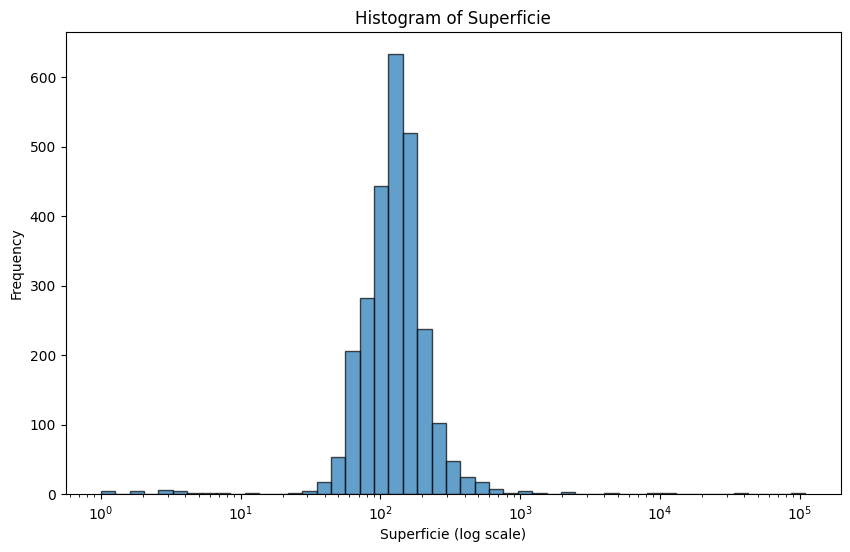

In [112]:

data = df['superficie'] 
bins = np.logspace(np.log10(data.min()), np.log10(data.max()), 50)

plt.figure(figsize=(10, 6))
plt.hist(data, bins=bins, edgecolor='k', alpha=0.7)
plt.xscale('log')
plt.xlabel('Superficie (log scale)')
plt.ylabel('Frequency')
plt.title('Histogram of Superficie')
plt.show()


**handling noise & outliers**

-> DECISION: min superficie 30 m²  max is 300 m²

**count outliers and handle outliers**

In [113]:
count = 0  

def round_up(value):
    global count  
    if value < 30:
        count += 1
        return 30
    elif value > 300:
        count += 1
        return 300
    return value 

df['superficie'] = df['superficie'].apply(round_up)

print(count)


119


In [114]:
print(df.superficie.describe())

count    2637.000000
mean      136.599545
std        59.989646
min        30.000000
25%        97.000000
50%       125.000000
75%       164.000000
max       300.000000
Name: superficie, dtype: float64


# Collective missing values

**if a row has a missing value (we excluded etat & etage because they contain alot of missing values already) and also price missing : we drop**

In [115]:
df_copy= df.drop(columns=['etat', 'etage'])
rows_with_nan = df_copy[(df_copy.isna().sum(axis=1) > 1) & (df_copy['prix'].isna())]

print(rows_with_nan)

     gouvernorat    delegation  prix  superficie  nb_pieces  chambres  \
5          tunis  Ain Zaghouan   NaN         148        3.0       NaN   
142        tunis    El Ouardia   NaN          74        2.0       1.0   
164        tunis      Gammarth   NaN         300        4.0       NaN   
238        tunis  Ariana Ville   NaN          30        4.0       2.0   
437        tunis  Ariana Ville   NaN         118        2.0       NaN   
...          ...           ...   ...         ...        ...       ...   
2593  la-manouba    La Manouba   NaN          57        1.0       1.0   
2594  la-manouba    La Manouba   NaN         125        3.0       1.0   
2598  la-manouba    La Manouba   NaN          68        1.0       1.0   
2600  la-manouba    La Manouba   NaN         107        2.0       1.0   
2601  la-manouba    La Manouba   NaN         101        3.0       1.0   

      salle_de_bains  
5                NaN  
142              NaN  
164              NaN  
238              NaN  
437     

In [116]:
df.drop(rows_with_nan.index, inplace=True)

**save current progress**

In [117]:
df.to_csv('../csv/after_cleaning/mubawab_preprocessed.csv', index=False)

# Clean etage column

In [118]:
df['etage'].info()

<class 'pandas.core.series.Series'>
Index: 2560 entries, 0 to 2636
Series name: etage
Non-Null Count  Dtype 
--------------  ----- 
937 non-null    object
dtypes: object(1)
memory usage: 40.0+ KB


**convert it to int**

In [119]:
df['etage'] = df['etage'].str.extract(r'(\d+)').astype(float).astype('Int64')  # Convert to integer while allowing NaN

print(df['etage'].head())


0       2
1    <NA>
2    <NA>
3    <NA>
4       2
Name: etage, dtype: Int64


**handle missing values: replace for most common value in each gouvernorat**

In [120]:
# Fill missing values with the mode for each 'gouvernorat'
df['etage'] = df['etage'].fillna(
    df.groupby('gouvernorat')['etage'].transform(lambda x: x.mode()[0] if not x.mode().empty else None)
)


**save current progress**

In [121]:
df.to_csv('../csv/after_cleaning/mubawab_preprocessed.csv', index=False)

# Clean salle de bain column

In [122]:
df['salle_de_bains'].info()

<class 'pandas.core.series.Series'>
Index: 2560 entries, 0 to 2636
Series name: salle_de_bains
Non-Null Count  Dtype  
--------------  -----  
2239 non-null   float64
dtypes: float64(1)
memory usage: 40.0 KB


In [123]:
df['salle_de_bains'] = df['salle_de_bains'].astype('Int64')  # Convert to integer while allowing NaN

print(df['salle_de_bains'].head())


0    2
1    2
2    1
3    1
4    2
Name: salle_de_bains, dtype: Int64


**handle missing value: if missing we can assume only 1 salle de bain**

In [124]:
df['salle_de_bains'] = df['salle_de_bains'].fillna(1)

**save current progress**

In [125]:
df.to_csv('../csv/after_cleaning/mubawab_preprocessed.csv', index=False)

# Clean chambre column

In [126]:
df['chambres'].info()

<class 'pandas.core.series.Series'>
Index: 2560 entries, 0 to 2636
Series name: chambres
Non-Null Count  Dtype  
--------------  -----  
2316 non-null   float64
dtypes: float64(1)
memory usage: 40.0 KB


**KNN Imputer for missing values**

In [149]:
knn_imputer = KNNImputer(n_neighbors=1)  # Increase number of neighbors
df['chambres'] = knn_imputer.fit_transform(df[['chambres']])
df['chambres'] = df['chambres'].round().astype(int)


In [128]:
df.to_csv('../csv/after_cleaning/mubawab_preprocessed.csv', index=False)

# Clean nb_piece column

In [129]:
df['nb_pieces'].isna().sum()

168

In [130]:
mask = df['nb_pieces'].isna() & df['chambres'].notna()
df.loc[mask, 'nb_pieces'] = df.loc[mask, 'chambres']
df['nb_pieces'].isna().sum()

0

# Clean price values

In [131]:
print(df.prix.describe())

count    2.044000e+03
mean     4.891627e+05
std      3.633349e+05
min      2.800000e+04
25%      2.680000e+05
50%      3.980000e+05
75%      5.906500e+05
max      5.200000e+06
Name: prix, dtype: float64


In [132]:
count = (df['prix'] >900000).sum() 
print(count)

173


In [133]:
count = (df['prix'] <100000).sum() 
print(count)

# print(df[df['prix'] < 100000])
# df[df['prix'] < 100000].to_csv('../csv/after_cleaning/out.csv', index=False)

11


In [134]:
df.iloc[(df['prix'] <100000).values, df.columns.get_loc('prix')] = 100000

In [135]:
df['prix'].isna().sum()

516

**drop columns with missing price**

In [136]:
df.dropna(subset=['prix'], inplace=True)

In [137]:
df.to_csv('../csv/after_cleaning/mubawab_preprocessed.csv', index=False)

# Encoding for categorical features

#  Ordinal encoding for etat

In [138]:
df['etat'].info()
# check the unique values in the column
print(df['etat'].unique())

<class 'pandas.core.series.Series'>
Index: 2044 entries, 3 to 2636
Series name: etat
Non-Null Count  Dtype 
--------------  ----- 
1769 non-null   object
dtypes: object(1)
memory usage: 31.9+ KB
["Moins d'un an" nan 'Bon état' 'Nouveau' '1-5 ans' '5-10 ans' '10-20 ans'
 '20-30 ans' 'À rénover' '30-50 ans' '70-100 ans']


In [139]:
df['etat'] = df['etat'].fillna('nan')

70-100 ans: 1  
50-70 ans: 2  
30-50 ans: 3  
À rénover: 4  
20-30 ans: 5  
10-20 ans: 6  
5-10 ans: 7  
1-5 ans: 8  
Moins d'un an: 9  
Nouveau: 10  
Bon état: 11


**number of values inferior than 100000 outliers**

In [ ]:
categories = [['nan', '70-100 ans','50-70 ans', '30-50 ans', 'À rénover', '20-30 ans', '10-20 ans', '5-10 ans', 
               '1-5 ans', 'Moins d\'un an', 'Nouveau', 'Bon état']]


# Initialize OrdinalEncoder with the custom order
ordinal_encoder = OrdinalEncoder(categories=categories)

# Apply Ordinal Encoding to the 'etat' column
df['etat_encoded'] = ordinal_encoder.fit_transform(df[['etat']])


**knn imputer for missing values**

In [ ]:

# Mark 0 as NaN for missing values
df['etat_encoded'] = df['etat_encoded'].replace(0.0, np.nan)

scaler = StandardScaler()
df['etat_encoded_scaled'] = scaler.fit_transform(df[['etat_encoded']])

knn_imputer = KNNImputer(n_neighbors=10)  # Increase number of neighbors
df['etat_encoded_scaled'] = knn_imputer.fit_transform(df[['etat_encoded_scaled']])

df['etat_encoded'] = scaler.inverse_transform(df[['etat_encoded_scaled']])

df['etat_encoded'] = df['etat_encoded'].round().astype(int)

df.drop(columns=['etat_encoded_scaled'], inplace=True)


In [ ]:
df['etat']= df['etat_encoded']
df.drop(columns=['etat_encoded'], inplace=True)

In [143]:
df.to_csv('../csv/after_cleaning/mubawab_preprocessed.csv', index=False)

# One hot encoding for gouvernorat

In [ ]:
# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[['gouvernorat']])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['gouvernorat']))

# Align indices before concatenating
one_hot_df.index = df.index

# Concatenate and drop the original column
df_encoded = pd.concat([df, one_hot_df], axis=1)
df = df_encoded.drop('gouvernorat', axis=1)

In [145]:
df.to_csv('../csv/after_cleaning/mubawab_preprocessed.csv', index=False)

# Encode delegation by rank given the average price for each delegation

**we have 38 delegation**
**the most expensive is 38, least expensive is 1**

In [ ]:
# calculate the average price for each delegation
avg_price = df.groupby('delegation')['prix'].mean().reset_index()
avg_price = avg_price.rename(columns={'prix': 'avg_price'})

# Rank delegations by average price
avg_price['rank'] = avg_price['avg_price'].rank(ascending=True)
avg_price = avg_price.sort_values(by='rank').reset_index(drop=True)
# print(avg_price)

# Merge rank back to original dataframe
df['delegation'] = df['delegation'].map(avg_price.set_index('delegation')['rank'])
# print(df)


In [147]:
df.to_csv('../csv/after_cleaning/mubawab_preprocessed.csv', index=False)

**make price last column**

In [148]:
# Reorder columns to make 'prix' the last column
cols = [col for col in df.columns if col != 'prix'] + ['prix']
df = df[cols]

df.to_csv('../csv/after_cleaning/mubawab_preprocessed.csv', index=False)